# Who stole the peanut butter jar?

This afternoon I wanted to have a peanut butter-jelly sandwich for lunch. I placed the peanut butter jar on the table, looked away for a second, and the jar just disappeared. Someone stole it!
I have a surveillance camera set up in my room and it took a photo of the crime suspect, although the footage is corrupted: it's very noisy, making it hard to identify the perpetrator. Luckily, we are living in a digital age, and I'm going to use my computer to try and repair the image. I will also try to figure out a way to prevent such incidents in the future, by teaching the computer to recognise the silhouette of the thief.

But first, let's have a look at the image.

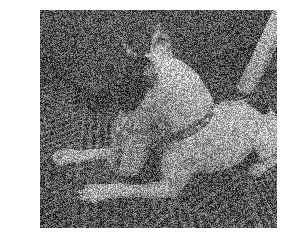

In [2]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

#Load the image
img = io.imread('Thief.jpg')    
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

#Due to an unlucky coincidence, a nearby electromagnetic source interfered with the camera and made the footage noisy 
nx,ny = img.shape
noise = np.random.rand(nx,ny)
img   = img + noise

#Anyway, let's have a look at the corrupted image of the thief
plt.imshow(img, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

## How computers see images?

In order to repair my image, first I have to understand how computers see images. I will create an array of numbers, as this is the language that computers understand. Can you guess what the computer will see? 

In [3]:
#create a 2D array of numbers
my_array = np.array(([3,20,2,23,16,6,24],[5,1,114,4,90,6,31],[21,7,14,12,9,21,24],[8,75,7,10,9,101,10], [15,7,96,89,73,18,5], [3,25,14,12,9, 21,16])) 

#Let's have a look now how the computer sees this. It sees a matrix of numbers. 
print(my_array)

[[  3  20   2  23  16   6  24]
 [  5   1 114   4  90   6  31]
 [ 21   7  14  12   9  21  24]
 [  8  75   7  10   9 101  10]
 [ 15   7  96  89  73  18   5]
 [  3  25  14  12   9  21  16]]


## How humans see images?

For us, humans, it's hard to imagine what these numbers actually mean, so let's translate 
this into something that we can easily interpret. 

We will make an image, where each pixel will be one element of the matrix. The numbers give the intensity of the pixels, or in other terms their colour. Pixel values can range between 0 <= pixel value <= 255, where 0 is black, 255 is white, with (more than 50) shades of gray in between.

Let's make this image!

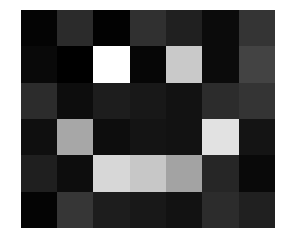

In [143]:
#make the image
plt.imshow(my_array, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

Our brain is looking for features in images, for example, I'm sure you've noticed the smiley face in the image :) This is what the computer saw before, but you probably did not (unless you are a computer reading this).

## How can a computer repair my image?

I will use convolution in order to repair the image. In the image domain, convolution is used to filter an image with specifically designed kernels (arrays). Such kernels can have the effect of blurring, sharpening your image, and more, just like your Instagram filters. 

So how does convolution work? Let's have a look at the convolution process. 

<img src="Convolution.png">
In this example, the kernel is a 3 by 3 array. We are illustrating convolution at the position of the input image marked in red, where the numbers in the kernel are used to weight the values of the input image. During the convolution process, the pixel values in the input image are multiplied by the values of the kernel at the corresponding location, and summed up to produce one number. This number will replace the value of the central pixel in the red area of the output image, or in other words convolved image. 
Next, the kernel will slide across all the areas of the input image, and we repeat this process for every location. Every unique pixel will be assigned a new number to produce the convolved image.

With the kernel presented above we are reducing the strength of the surrounding pixels by multiplying them with -1, and enhancing the strenght of the central pixel at the same time. This specific kernel is called an edge detector, as it is sensitive to detecting discontinuities and variations in brightness.

Let's explore what other types of kernels are out there, and which one can can help us to repair our picture. 


# Gaussian blurring

Gaussian blurring is the process of convolving an image with a Gaussian function.  

A one-dimensional Gaussian function is described as:
G($x$) = $\frac{1}{\sqrt{2 \pi \sigma^2}}e^\frac{-x^2}{2\sigma^2}$
, where $\sigma$ is the standard deviation, describing the width of the distribution.

Let's quickly illustrate a 1D Gaussian-type function.

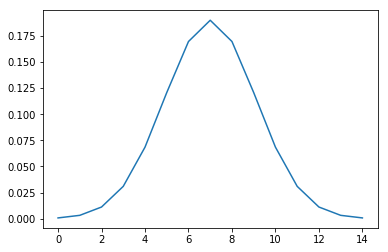

In [4]:
def gauss1d():
    x = np.linspace(-1,1,15)
    d = np.sqrt(x*x)
    sigma = 0.3
    g = np.exp(-( d**2 / ( 2.0 * sigma**2 ) ) )
    return g /np.sum(g) # normalising the array to 1 in order to avoid darkening or brightening of the image

gauss_1d_funct = gauss1d()

plt.plot(gauss_1d_funct)
plt.show()

The two-dimensional Gaussian function, or Gaussian kernel, is the product of two 1D Gaussians:

G($x, y$) = $\frac{1}{2 \pi \sigma^2}e^{- \frac{x^2+y^2}{2\sigma^2}}$
, where $x$ and $y$ are the distances from the origin in the horizontal and vertical axis, respectively.

As illustrated below on a surface, it is composed of concentric circles with a Gaussian distribution from the center point. 

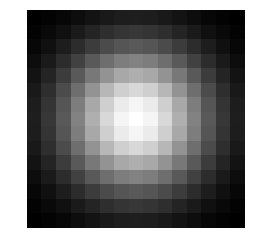

In [16]:
def gauss2d():
    x, y = np.meshgrid(np.linspace(-1,1,15), np.linspace(-1,1,15))
    d = np.sqrt(x*x + y*y)
    sigma = 0.5
    g = np.exp(-( d**2 / ( 2.0 * sigma**2 ) ) )
    return g/np.sum(g)

kernel_gaussian_blur = gauss2d()

plt.imshow(kernel_gaussian_blur, cmap = plt.cm.gray)
plt.axis('off')
plt.show()


When we convolve our image with this kernel, each pixel value will be set to a weighted average of its surrounding pixels. The central pixel has the highest weight (the strongest enhancement), and the weights decrease as function of distance. The result is a blur, often used to reduce noise in images.  

So let's convolve our image and reduce its noise level!

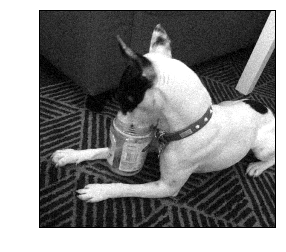

In [17]:
# we will use scipy's signal processing toolbox to convolve two 2D arrays
import scipy.signal
from skimage import exposure

# convolove the image with the Gaussian kernel using the convolve2d function
image_gaussian = scipy.signal.convolve2d(img, kernel_gaussian_blur)

# Contrast stretching: rescale image to include intensities that fall within the 2nd and 98th percentiles
p2, p98 = np.percentile(image_gaussian, (2, 98))
image_gaussian_perc = exposure.rescale_intensity(image_gaussian, in_range=(p2, p98))

# let's have a look at the image
plt.imshow(image_gaussian_perc, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

Wohoo, the noise in the image is reduced and I know now who is responsible for the disappearance of the peanut butter jar! But would a computer know this too? How can I help the computer identify my dog?

## Edge-detection

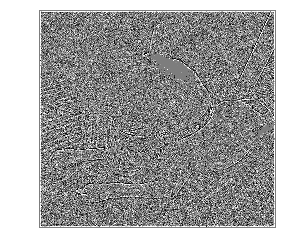

In [18]:
#let's use the edge detector that we have defined before
kernel_edge =  np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1])) 

# convolve blurred image with edge-detecting kernel
image_edge = scipy.signal.convolve2d(image_gaussian_perc, kernel_edge)
   
# Contrast stretching:
p2, p98 = np.percentile(image_edge, (2, 98))
image_edge_perc = exposure.rescale_intensity(image_edge, in_range=(p2, p98))

plt.imshow(image_edge_perc,  cmap = plt.cm.gray)
plt.axis('off')
plt.show()

I see some edges but the quality is not the best. What happens if I apply Gaussian blurring again? 

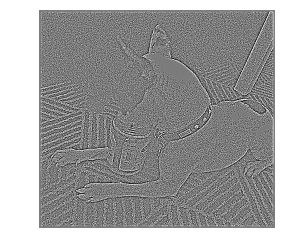

In [19]:
image_edge_gaussian = scipy.signal.convolve2d(image_edge_perc, kernel_gaussian_blur)

plt.imshow(image_edge_gaussian,  cmap = plt.cm.gray)
plt.axis('off')
plt.show()

We detected some edges, this means I will be able to teach my computer to recognise the silhoutte of the thief and catch him in action. I just have to write a classification algorithm that is able identify the edge pattern of the thief and then alert my security system. Although I still have to figure out how exactly to do that.

# Conclusions

Thanks to the power of computer vision, I repaired my image in a few steps using convolution. First I applied Gaussian blurring to decrease the noise in my image, and then used an edge detector to identify the silhouette of the thief. 

I now know who stole the peanut butter jar! The dog is not getting dinner tonight!

# Shortcomings of this project

I didn't discuss the fact that images can be coloured as well. Coloured images are represented as 3D arrays, where the third dimension corresponds to the RGB channels (Red, Green, Blue). In this case pixels will have the combination of the 3 colours associated to them.

When I look up examples on the internet, coloured images are often converted into black & white before applying convolution. This gets rid of the third dimension, making working with the image computationally less expensive, but I'm wondering if there is anyhting more I need to know about the advantages of working with black and white images. 
